In [1]:
import matplotlib.pyplot as plt
from module.for_dataset.create_dataset import create_dataset
from module.for_model.training import construct_and_train_model
from module.for_dataset.normalization import normalization
from module.for_model.checkpoint import save_checkpoint

# Construct dataset

In [2]:
X_train, Y_train, X_test, Y_test  = create_dataset(0,20000, "xor")

# 原本數值介於 +-2 之間而已，所以就不用 normalize 了
# 跑了一遍之後發現好像還是需要限縮到 0~1

In [3]:
for x, y , idx in zip(X_train[:5], Y_train[:5], range(len(Y_train))):
    print(f"{idx}\tx = {x},\tY = {y}")

0	x = [1.05847943 0.9479282 ],	Y = 0
1	x = [ 1.13383334 -0.11858177],	Y = 1
2	x = [0.96636156 0.85844844],	Y = 0
3	x = [-0.19368895  0.1242411 ],	Y = 0
4	x = [ 1.21024244 -0.12977356],	Y = 1


### Preprocess

#### 觀察資料
發現 X 值
1. 有正有負
2. 明顯以 0.5 為中心，分隔開來的兩堆資料 (Y也是)

In [4]:
X_train.shape

(16000, 2)

(array([[1184., 1150., 1111., 1187., 1140., 1153., 1150.,    0.,    0.,
            0.,    0.,    0.,    0., 1209., 1115., 1114., 1107., 1127.,
         1146., 1107.],
        [1177., 1190., 1130., 1099., 1148., 1209., 1168.,    0.,    0.,
            0.,    0.,    0.,    0., 1115., 1159., 1118., 1125., 1139.,
         1123., 1100.]]),
 array([-4.99894733e-01, -3.99901412e-01, -2.99908091e-01, -1.99914770e-01,
        -9.99214491e-02,  7.18719108e-05,  1.00065193e-01,  2.00058514e-01,
         3.00051835e-01,  4.00045156e-01,  5.00038477e-01,  6.00031798e-01,
         7.00025119e-01,  8.00018440e-01,  9.00011761e-01,  1.00000508e+00,
         1.09999840e+00,  1.19999172e+00,  1.29998505e+00,  1.39997837e+00,
         1.49997169e+00]),
 <a list of 2 BarContainer objects>)

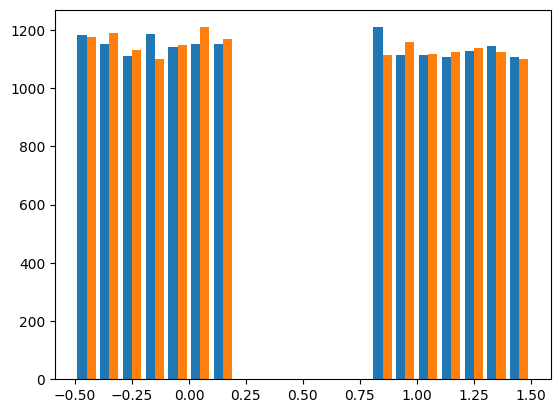

In [5]:
plt.hist(X_train, bins=20)

(array([[284., 291., 303., 319., 284., 272., 271.,   0.,   0.,   0.,   0.,
           0.,   0., 269., 290., 291., 291., 274., 281., 280.],
        [300., 299., 276., 272., 260., 311., 268.,   0.,   0.,   0.,   0.,
           0.,   0., 273., 302., 300., 322., 263., 270., 284.]]),
 array([-4.99601706e-01, -3.99626601e-01, -2.99651496e-01, -1.99676390e-01,
        -9.97012850e-02,  2.73820280e-04,  1.00248926e-01,  2.00224031e-01,
         3.00199136e-01,  4.00174241e-01,  5.00149347e-01,  6.00124452e-01,
         7.00099557e-01,  8.00074662e-01,  9.00049768e-01,  1.00002487e+00,
         1.09999998e+00,  1.19997508e+00,  1.29995019e+00,  1.39992529e+00,
         1.49990040e+00]),
 <a list of 2 BarContainer objects>)

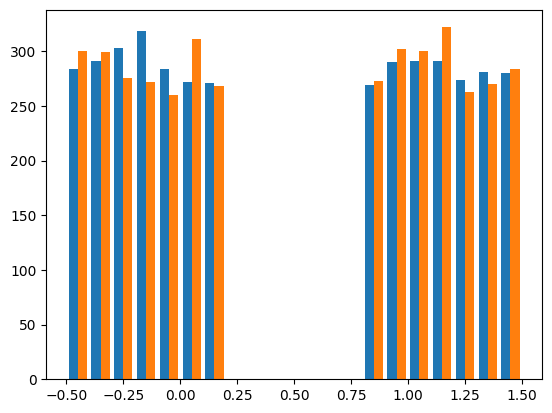

In [6]:
plt.hist(X_test, bins=20)

(array([7996.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8004.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

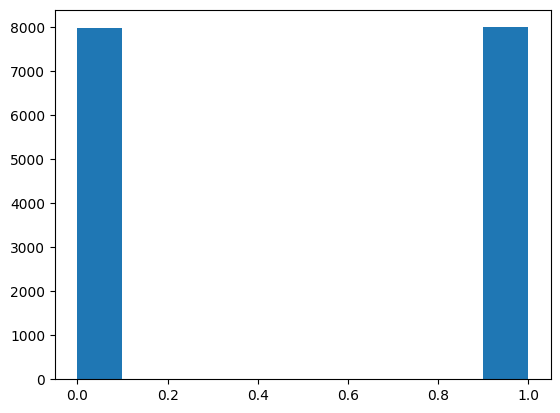

In [7]:
plt.hist(Y_train)

(array([2012.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1988.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

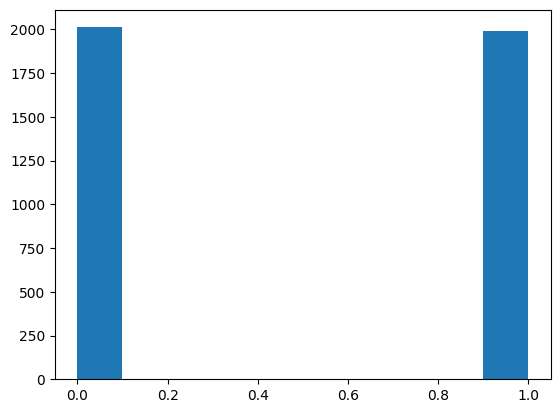

In [8]:
plt.hist(Y_test)

#### 平移+正規化

In [9]:
# reshape for the model output
# 因為計算 backprobagetion 時矩陣相乘的問題，所以需轉換
# 但 shape = (1,) 者無法透過 .T 轉置，所以必須 reshape
Y_train = Y_train.reshape((-1,1))
Y_test = Y_test.reshape((-1,1))

In [10]:
normalizer = normalization(X_train-0.5)
X_train_n = normalizer.normalize(X_train-0.5)
Y_train_n = normalizer.normalize(Y_train-0.5)
X_test_n = normalizer.normalize(X_test-0.5)
Y_test_n = normalizer.normalize(Y_test-0.5)

(array([[1184., 1150., 1111., 1187., 1140., 1153., 1150.,    0.,    0.,
            0.,    0.,    0.,    0., 1209., 1115., 1114., 1107., 1127.,
         1146., 1107.],
        [1177., 1190., 1130., 1099., 1148., 1209., 1168.,    0.,    0.,
            0.,    0.,    0.,    0., 1115., 1159., 1118., 1125., 1139.,
         1123., 1100.]]),
 array([-4.99894733e-01, -3.99901412e-01, -2.99908091e-01, -1.99914770e-01,
        -9.99214491e-02,  7.18719108e-05,  1.00065193e-01,  2.00058514e-01,
         3.00051835e-01,  4.00045156e-01,  5.00038477e-01,  6.00031798e-01,
         7.00025119e-01,  8.00018440e-01,  9.00011761e-01,  1.00000508e+00,
         1.09999840e+00,  1.19999172e+00,  1.29998505e+00,  1.39997837e+00,
         1.49997169e+00]),
 <a list of 2 BarContainer objects>)

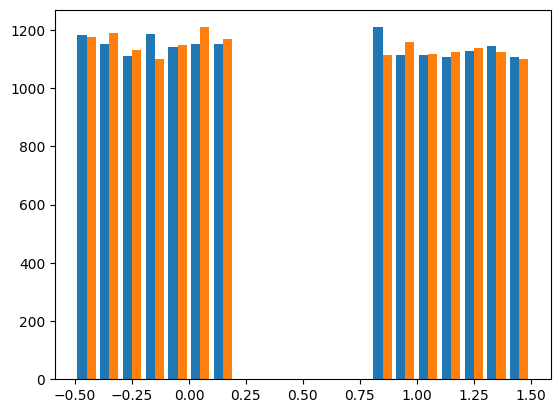

In [11]:
plt.hist(X_train, bins=20)

In [12]:
data = [X_train_n, Y_train_n, X_test_n, Y_test_n]

In [13]:
# 為了之後畫動畫
data_2_save = [X_train_n, Y_train.flatten(), X_test_n, Y_test.flatten()]
import pickle
path_folder = "data\\xor_normalized"
path_loss = f"{path_folder}\\2024_0606_0319.pkl"
with open(path_loss, 'wb') as f:
    pickle.dump(data_2_save, f)

# Train and Record

In [14]:
folder_test_name = "2024_0606_0319"
n = 2

folder_node = f"node_{n:02d}"
path_folder = f"checkpoints\\{folder_test_name}\\{folder_node}"

loss_n = []
param_n = []
# 用 30 個不同的 randam seed 訓練 30 個不同的模型
for layer_initializer in range(30):
    print(f"\tlayer_initializer = {layer_initializer}")    

    ttl_loss, ttl_param = \
        construct_and_train_model(
            n = n,
            layer_initializer = layer_initializer,
            data = data,
            epoch_cycle = 1
        )
    loss_n.append(ttl_loss)
    param_n.append(ttl_param)

save_checkpoint(path_folder, loss_n, param_n)

	layer_initializer = 0
	layer_initializer = 1
	layer_initializer = 2
	layer_initializer = 3
	layer_initializer = 4
	layer_initializer = 5
	layer_initializer = 6
	layer_initializer = 7
	layer_initializer = 8
	layer_initializer = 9
	layer_initializer = 10
	layer_initializer = 11
	layer_initializer = 12
	layer_initializer = 13
	layer_initializer = 14
	layer_initializer = 15
	layer_initializer = 16
	layer_initializer = 17
	layer_initializer = 18
	layer_initializer = 19
	layer_initializer = 20
	layer_initializer = 21
	layer_initializer = 22
	layer_initializer = 23
	layer_initializer = 24
	layer_initializer = 25
	layer_initializer = 26
	layer_initializer = 27
	layer_initializer = 28
	layer_initializer = 29


('checkpoints\\2024_0606_0319\\node_02\\loss.pkl',
 'checkpoints\\2024_0606_0319\\node_02\\param.pkl')